#EMPLOYEE ATTRITION WITH DECISION TREE

In [ ]:
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv("/content/HR-Employee-Attrition.csv")

In [ ]:
data.shape

(1470, 35)

In [ ]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

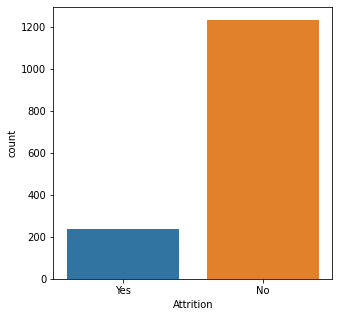

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(x=data['Attrition'])

In [ ]:
cat=data[['Attrition','BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime','Over18']]

In [ ]:
cat.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime,Over18
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes,Y
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No,Y
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes,Y
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes,Y
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No,Y


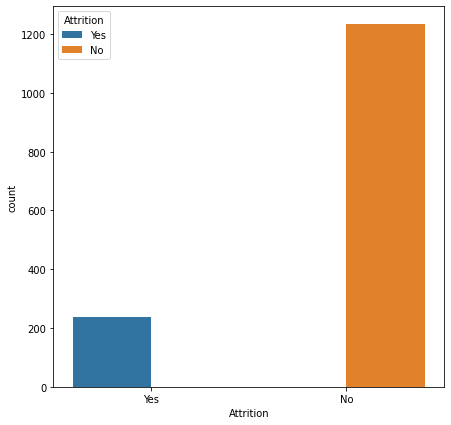

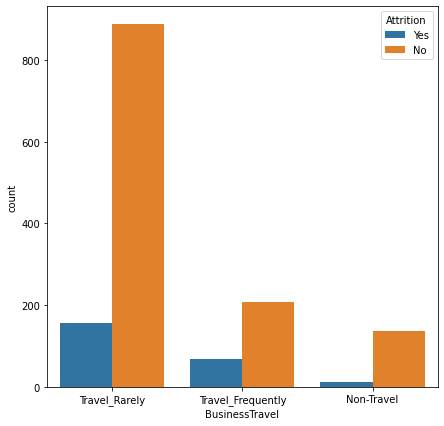

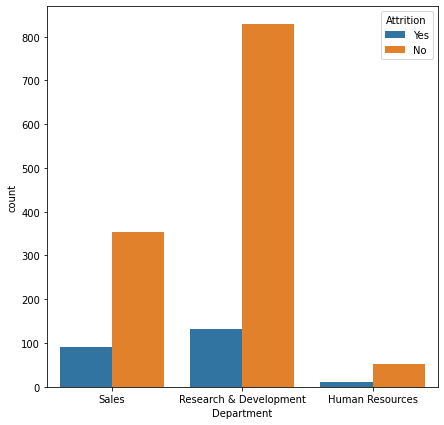

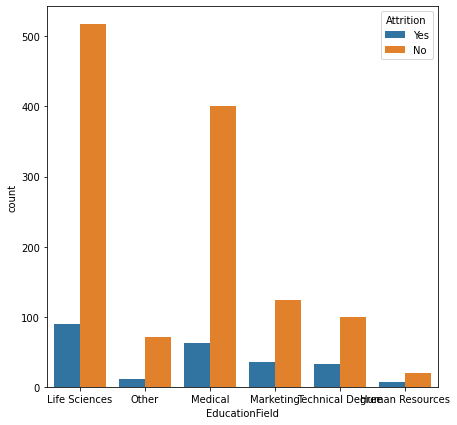

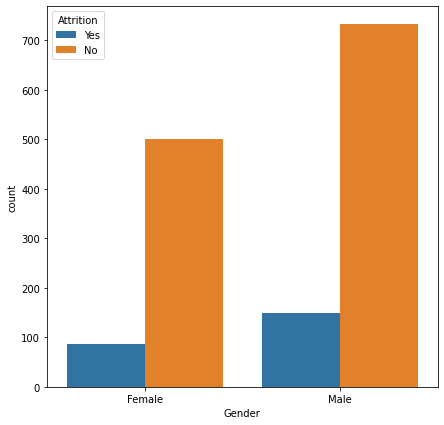

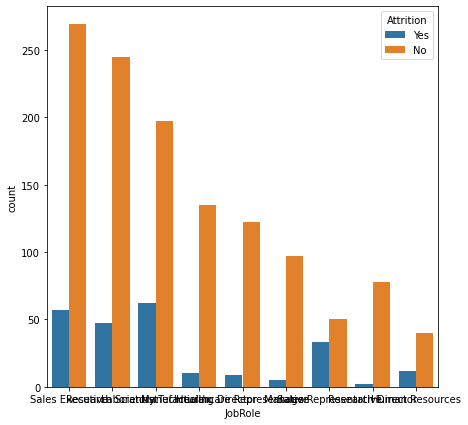

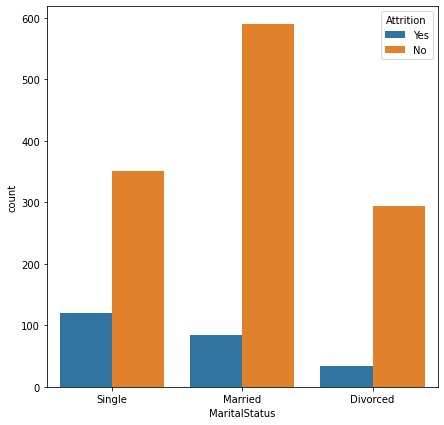

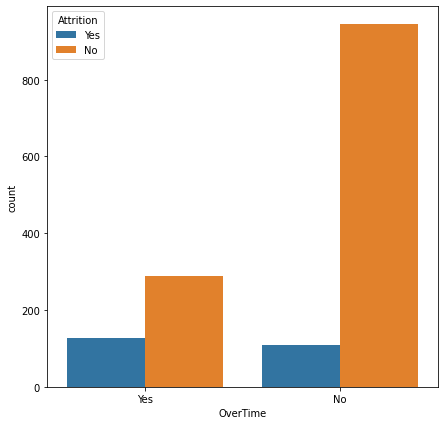

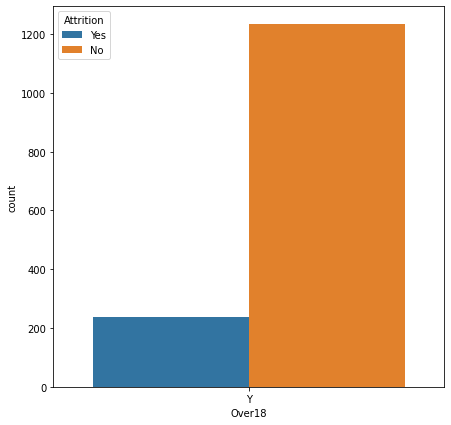

In [ ]:
for i in cat:
  plt.figure(figsize=(7,7))
  sns.countplot(data=data, x=i,hue='Attrition')

In [ ]:
num=data[['Age','DailyRate','DistanceFromHome','HourlyRate','MonthlyIncome','MonthlyRate','NumCompaniesWorked','PercentSalaryHike',
'TotalWorkingYears','TrainingTimesLastYear' ,'WorkLifeBalance','YearsAtCompany', 
'YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]

In [ ]:
num.head()

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,94,5993,19479,8,11,8,0,1,6,4,0,5
1,49,279,8,61,5130,24907,1,23,10,3,3,10,7,1,7
2,37,1373,2,92,2090,2396,6,15,7,3,3,0,0,0,0
3,33,1392,3,56,2909,23159,1,11,8,3,3,8,7,3,0
4,27,591,2,40,3468,16632,9,12,6,3,3,2,2,2,2


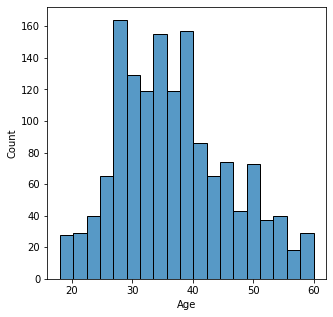

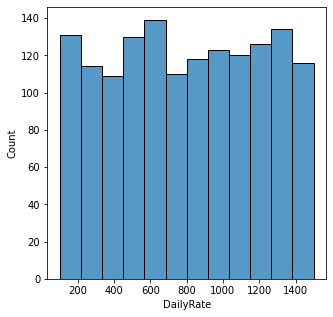

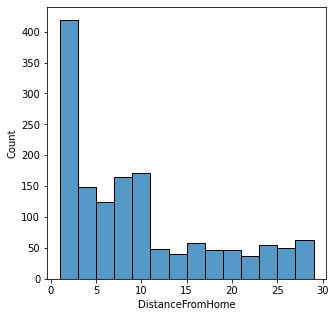

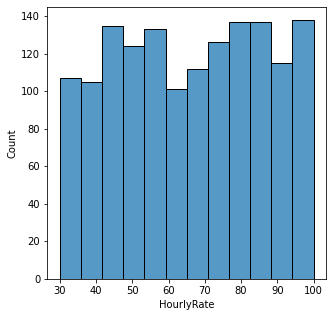

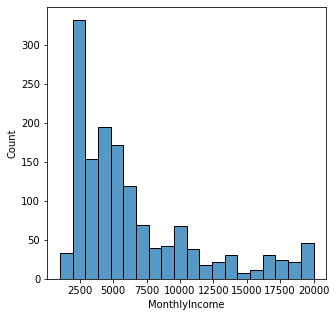

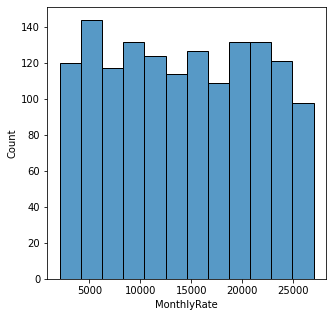

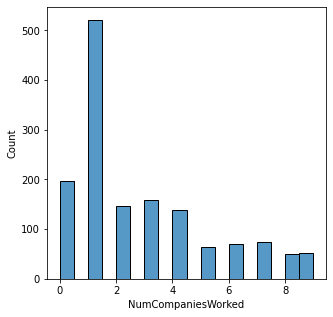

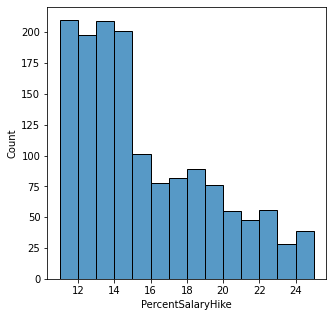

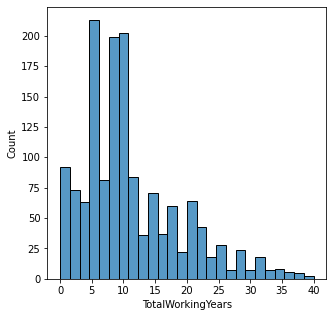

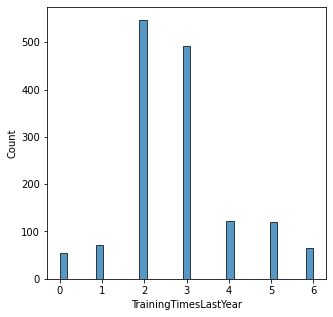

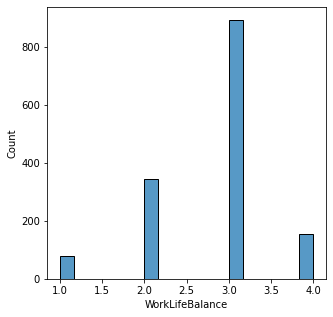

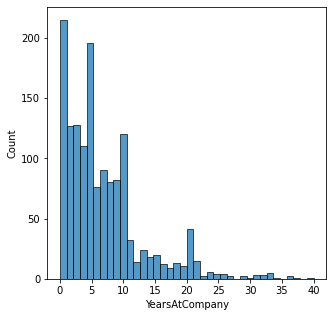

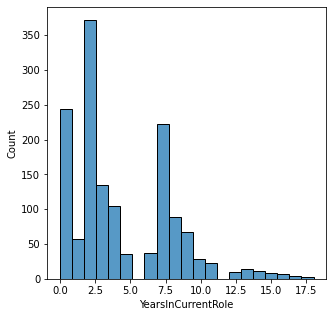

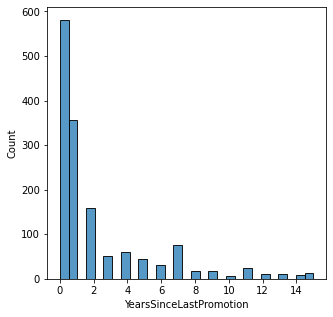

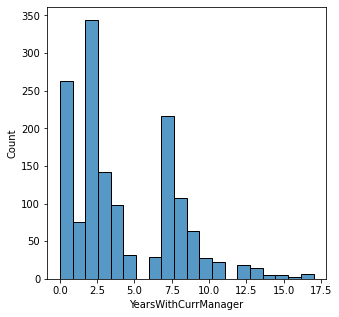

In [ ]:
for i in num:
  plt.figure(figsize=(5,5))
  sns.histplot(data=data, x=i)

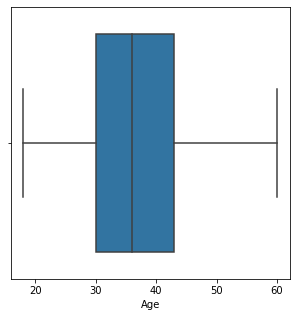

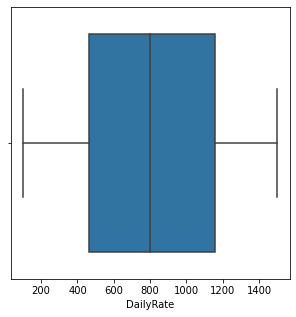

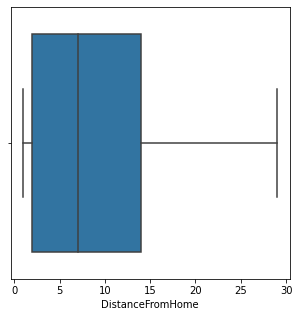

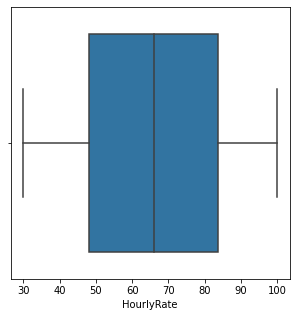

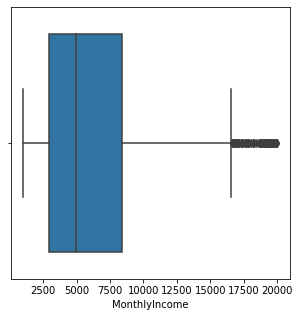

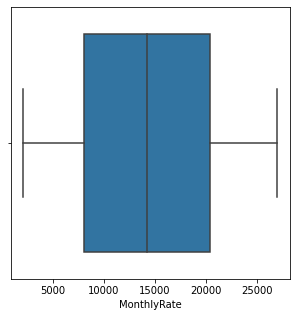

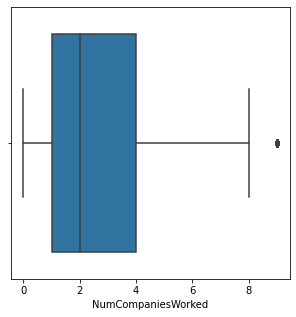

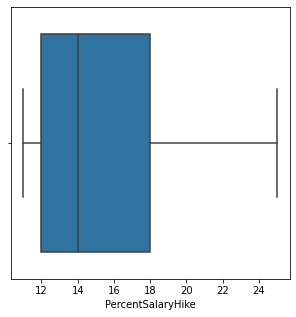

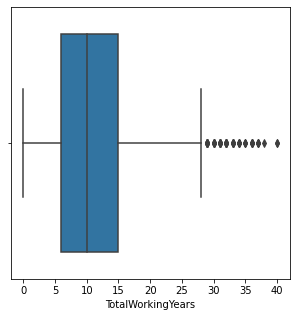

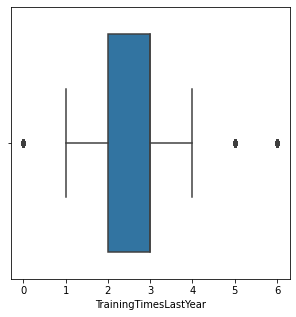

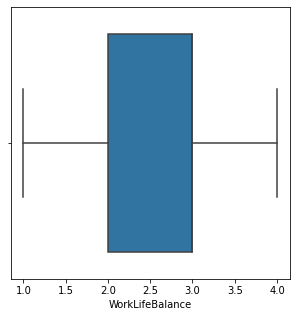

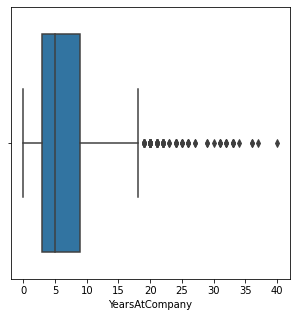

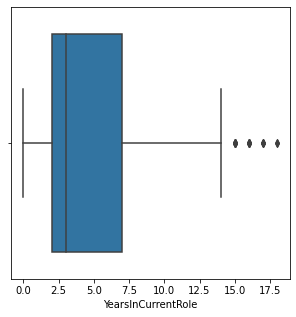

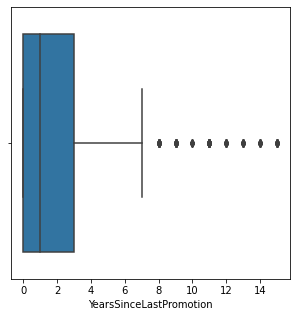

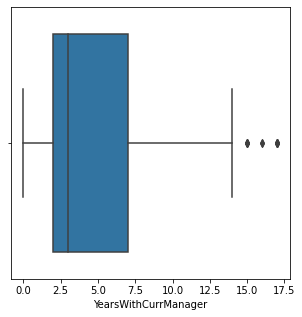

In [ ]:
for i in num:
  plt.figure(figsize=(5,5))
  sns.boxplot(data=data, x=i)

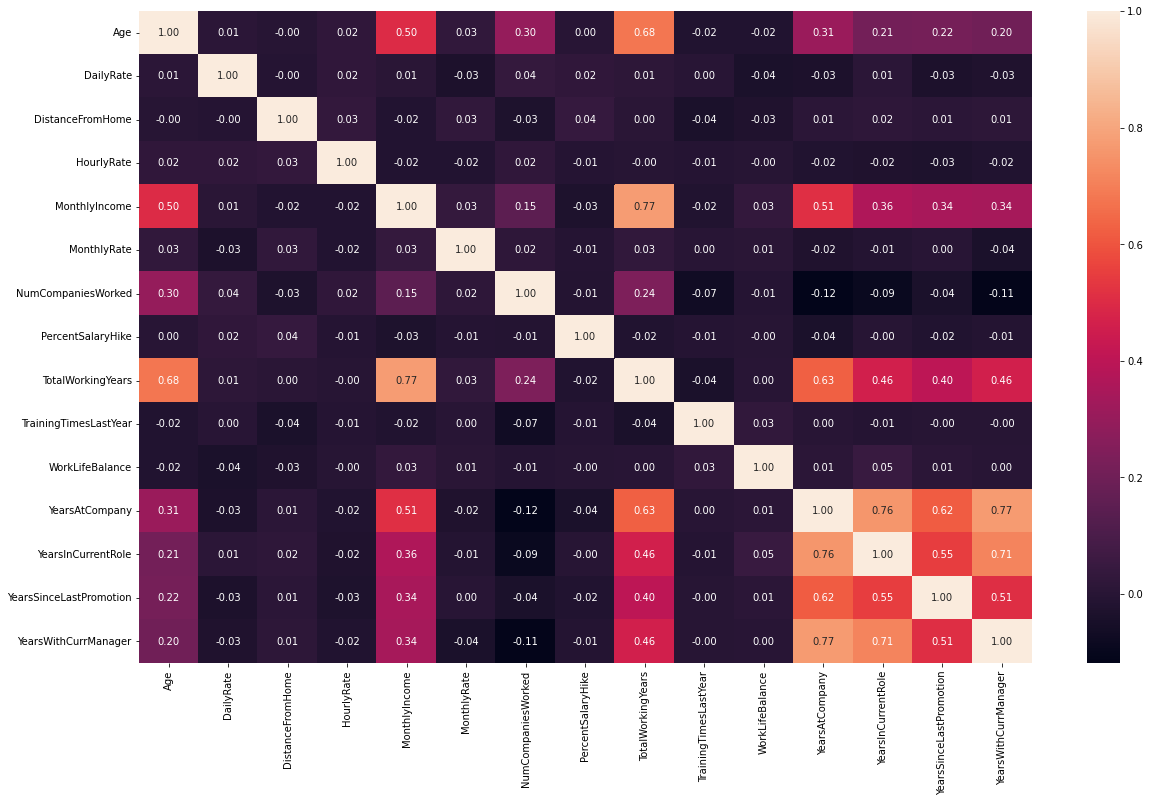

In [ ]:
plt.figure(figsize = (20, 12))
corr = num.corr()
sns.heatmap(corr, annot = True, fmt = ".2f")

In [ ]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
data['Attrition'] = data['Attrition'].apply(lambda val: 1 if val == 'Yes' else 0)

In [ ]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [ ]:

cat1 = (OneHotEncoder(sparse=False,handle_unknown='ignore')
               .fit_transform(cat[['BusinessTravel','Gender','JobRole','MaritalStatus','OverTime']])
              )

cat1= pd.DataFrame(cat1)

In [ ]:
cat1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
x.head()

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,BusinessTravel,Gender,JobRole,MaritalStatus,OverTime
0,41,1102,1,94,5993,19479,8,11,8,0,1,6,4,0,Travel_Rarely,Female,Sales Executive,Single,Yes
1,49,279,8,61,5130,24907,1,23,10,3,3,10,7,1,Travel_Frequently,Male,Research Scientist,Married,No
2,37,1373,2,92,2090,2396,6,15,7,3,3,0,0,0,Travel_Rarely,Male,Laboratory Technician,Single,Yes
3,33,1392,3,56,2909,23159,1,11,8,3,3,8,7,3,Travel_Frequently,Female,Research Scientist,Married,Yes
4,27,591,2,40,3468,16632,9,12,6,3,3,2,2,2,Travel_Rarely,Male,Laboratory Technician,Married,No


In [ ]:

x=num.join(cat1)

In [ ]:
x=x.drop(columns=['Attrtion'])

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      1470 non-null   int64  
 1   DailyRate                1470 non-null   int64  
 2   DistanceFromHome         1470 non-null   int64  
 3   HourlyRate               1470 non-null   int64  
 4   MonthlyIncome            1470 non-null   int64  
 5   MonthlyRate              1470 non-null   int64  
 6   NumCompaniesWorked       1470 non-null   int64  
 7   PercentSalaryHike        1470 non-null   int64  
 8   TotalWorkingYears        1470 non-null   int64  
 9   TrainingTimesLastYear    1470 non-null   int64  
 10  WorkLifeBalance          1470 non-null   int64  
 11  YearsAtCompany           1470 non-null   int64  
 12  YearsInCurrentRole       1470 non-null   int64  
 13  YearsSinceLastPromotion  1470 non-null   int64  
 14  YearsWithCurrManager    

In [ ]:
x.head()

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,...,9,10,11,12,13,14,15,16,17,18
0,41,1102,1,94,5993,19479,8,11,8,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,49,279,8,61,5130,24907,1,23,10,3,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,37,1373,2,92,2090,2396,6,15,7,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,33,1392,3,56,2909,23159,1,11,8,3,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,27,591,2,40,3468,16632,9,12,6,3,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
y=data['Attrition']

In [ ]:
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 0)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc1=DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=3)
dtc2=DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=3)

In [ ]:
x_train

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,...,9,10,11,12,13,14,15,16,17,18
338,30,570,5,30,6118,5431,1,13,10,2,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
363,33,350,5,34,2851,9150,1,13,1,2,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
759,45,788,24,36,2177,8318,1,16,6,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
793,28,895,15,50,2207,22482,1,16,4,5,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
581,30,921,1,38,3833,24375,3,21,7,2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,34,1333,10,87,2220,18410,1,19,1,2,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
835,35,528,8,100,4323,7108,1,17,6,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1216,43,1179,2,73,7847,6069,1,17,10,3,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
559,38,268,2,92,3057,20471,6,13,6,0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [ ]:
y_train

338     0
363     1
759     0
793     0
581     0
       ..
763     0
835     0
1216    0
559     0
684     0
Name: Attrition, Length: 1029, dtype: int64

In [ ]:
dtc1.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


DecisionTreeClassifier(max_depth=3, random_state=3)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [ ]:
y_pred1=dtc1.predict(x_test)
print('Model accuracy score with criterion gini index: ')
accuracy_score(y_test, y_pred1)


Model accuracy score with criterion gini index: 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


0.8390022675736961

In [ ]:
print(classification_report(y_test, y_pred))

'              precision    recall  f1-score   support\n\n           0       0.85      0.98      0.91       371\n           1       0.45      0.07      0.12        70\n\n    accuracy                           0.84       441\n   macro avg       0.65      0.53      0.52       441\nweighted avg       0.79      0.84      0.79       441\n'

In [ ]:
dtc2.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=3)

In [ ]:
y_pred1=dtc2.predict(x_test)
print('Model accuracy score with criterion gini index: ')
accuracy_score(y_test, y_pred1)


Model accuracy score with criterion gini index: 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


0.8390022675736961

In [ ]:
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(dtc1.fit(x_train, y_train)) 


In [ ]:
cm=confusion_matrix(y_test, y_pred1)
print(cm)


[[365   6]
 [ 65   5]]


In [ ]:
def show_metrics():
    tp = cm[1,1]
    fn = cm[1,0]
    fp = cm[0,1]
    tn = cm[0,0]
    print('Accuracy  =     {:.3f}'.format((tp+tn)/(tp+tn+fp+fn)))
    print('Precision =     {:.3f}'.format(tp/(tp+fp)))
    print('Recall    =     {:.3f}'.format(tp/(tp+fn)))
    print('F1_score  =     {:.3f}'.format(2*(((tp/(tp+fp))*(tp/(tp+fn)))/
                                                 ((tp/(tp+fp))+(tp/(tp+fn))))))

In [ ]:
show_metrics()

Accuracy  =     0.839
Precision =     0.455
Recall    =     0.071
F1_score  =     0.123
